In [1]:
from ranks import *
from diversity_stats import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.transforms import Affine2D
import json

In [15]:
sns.set(style='whitegrid')


In [3]:
def extract_data(label, data_dict):
    diversity_list = list()
    for iter_nb in range(4):
        diversity_list.append(data_dict[iter_nb][label]['diversity_score'])
    if 4 in data_dict.keys():
        diversity_list.append(data_dict[4][label]['diversity_score'])
    return diversity_list

In [4]:
def extract_data_new(label, data_dict):
    diversity_list = list()
    std_error_list = list()
    for iter_nb in range(4):
        diversity_list.append(data_dict[iter_nb][label]['mean_max_diversity'])
        std_error_list.append(data_dict[iter_nb][label]['mean_max_diversity_std_error'])
    if 4 in data_dict.keys():
        diversity_list.append(data_dict[4][label]['mean_max_diversity'])
        std_error_list.append(data_dict[4][label]['mean_max_diversity_std_error'])    
    return [diversity_list, std_error_list]

In [11]:
def extract_data_bis(label, data_dict):
    diversity_list = list()
    std_error_list = list()
    for iter_nb in range(5):
        diversity_list.append(data_dict[iter_nb][label]['diversity_score']['mean_diversity'])
        std_error_list.append(data_dict[iter_nb][label]['diversity_score']['mean_diversity_std_error'])   
    return [diversity_list, std_error_list]

In [6]:
output_path = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/fig/diversity'

In [7]:
labels=['is_hired_1mo', 'is_unemployed', 'lost_job_1mo','job_offer', 'job_search']

In [8]:
iter_nb = range(5)

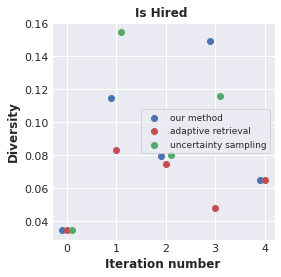

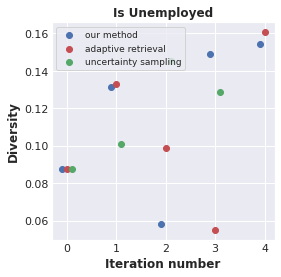

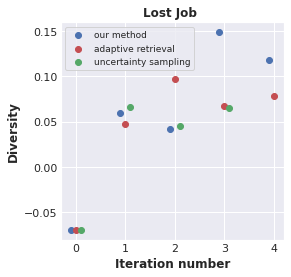

In [8]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
    trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
    diversity_list_our_method = extract_data(label, our_method_diversity_calibrated)
    diversity_list_adaptive = extract_data(label, adaptive_diversity_calibrated)
    diversity_list_uncertainty = extract_data(label, uncertainty_diversity_calibrated)
    ax.scatter(iter_nb, diversity_list_our_method, c='b', label='our method', transform=trans1)
    ax.scatter(iter_nb, diversity_list_adaptive, c='r', label='adaptive retrieval')
    ax.scatter(range(4), diversity_list_uncertainty, c='g', label='uncertainty sampling', transform=trans2)
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
#     ax.set_ylim([-0.05,1.05])
    plt.savefig(os.path.join(output_path,f'diversity_topP_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

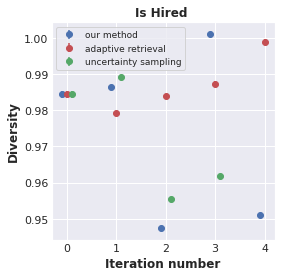

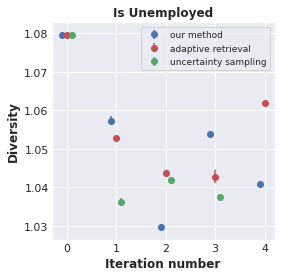

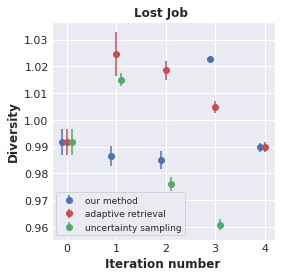

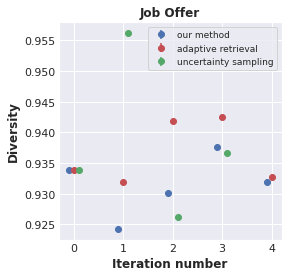

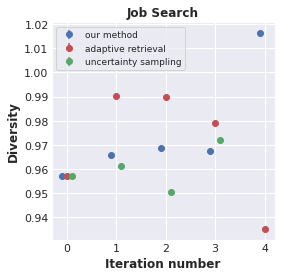

In [16]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    diversity_list_our_method, std_list_our_method = extract_data_new(label, our_method_distance_with_seed)
    diversity_list_adaptive, std_list_adaptive = extract_data_new(label, adaptive_distance_with_seed)
    diversity_list_uncertainty, std_list_uncertainty = extract_data_new(label, uncertainty_distance_with_seed)
    trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
    trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
    #ax.scatter(iter_nb, mean_list_our_method, c='b', label='our method')
    ax.errorbar(iter_nb, diversity_list_our_method, std_list_our_method, linestyle='None', marker='o', transform=trans1, label='our method', c='b')
#     ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    #ax.scatter(iter_nb, mean_list_adaptive, c='r', label='adaptive retrieval')
    ax.errorbar(iter_nb, diversity_list_adaptive, std_list_adaptive, linestyle='None', marker='o', label='adaptive retrieval', c='r')
#     ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    #ax.scatter(range(4), mean_list_uncertainty, c='g', label='uncertainty sampling')
    ax.errorbar(range(4), diversity_list_uncertainty, std_list_uncertainty, linestyle='None', marker='o', transform=trans2, label='uncertainty sampling', c='g')
#     ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
#     ax.set_ylim([0.1, 300])
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'{label}_distance_with_seed.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

# diversity positives evaluation

In [9]:
data_path = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/evaluation_metrics/US/diversity/positives_evaluation'

In [3]:
with open(os.path.join(data_path, 'diversity_positives_top10000.json'), 'r') as JSON:
    json_dict = json.load(JSON)

In [4]:
json_dict

{'exploit_explore_retrieval': {'0': {'is_hired_1mo': {'diversity_score': {'mean_diversity': -0.5523369664761734,
     'mean_diversity_std_error': 0.004485937122619171}},
   'lost_job_1mo': {'diversity_score': {'mean_diversity': -0.45785806179046634,
     'mean_diversity_std_error': 0.04464911708556038}},
   'is_unemployed': {'diversity_score': {'mean_diversity': -0.5764760911464691,
     'mean_diversity_std_error': 0.03971814248925785}},
   'job_offer': {'diversity_score': {'mean_diversity': -0.46846401297157597,
     'mean_diversity_std_error': 0.00196942542121267}},
   'job_search': {'diversity_score': {'mean_diversity': -0.6820406565737854,
     'mean_diversity_std_error': 0.003706316777521841}}},
  '1': {'is_hired_1mo': {'diversity_score': {'mean_diversity': -0.5604335871057131,
     'mean_diversity_std_error': 0.0032963382660085717}},
   'lost_job_1mo': {'diversity_score': {'mean_diversity': -0.4344933245599538,
     'mean_diversity_std_error': 0.007254816475385489}},
   'is_unemp

In [9]:
extract_data_bis('is_hired_1mo', json_dict['adaptive'])

NameError: name 'json_dict' is not defined

In [13]:
extract_data_bis('job_search', diversity_positives_top10k_dict['exploit_explore_retrieval'])

[[-0.6820406565737854,
  -0.6263713148606699,
  -0.41995662880653106,
  -0.5979958322415935,
  -0.6296218819376351],
 [0.003706316777521841,
  0.0037494648821028605,
  0.006087691694713938,
  0.0036999837623536485,
  0.002895627374787474]]

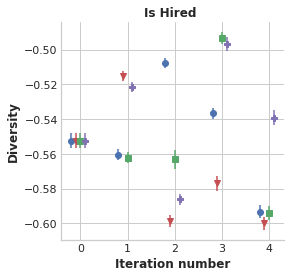

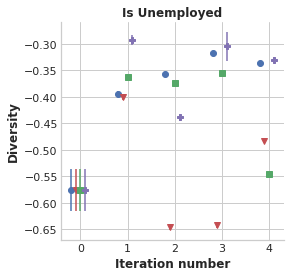

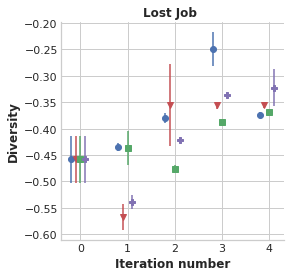

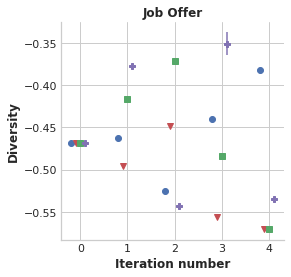

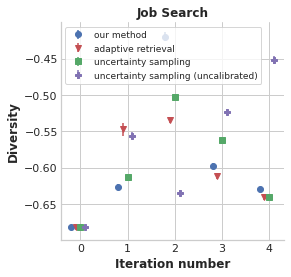

In [22]:
for num, label in enumerate(labels):
    fig,ax = plt.subplots(figsize=(4,4))
    diversity_list_our_method, std_list_our_method = extract_data_bis(label, diversity_positives_top10k_dict['exploit_explore_retrieval'])
    diversity_list_adaptive, std_list_adaptive = extract_data_bis(label, diversity_positives_top10k_dict['adaptive'])
    diversity_list_uncertainty, std_list_uncertainty = extract_data_bis(label, diversity_positives_top10k_dict['uncertainty'])
    diversity_list_uncertainty_uncalibrated, std_list_uncertainty_uncalibrated = extract_data_bis(label, diversity_positives_top10k_dict['uncertainty_uncalibrated'])

    trans1 = Affine2D().translate(-0.2, 0.0) + ax.transData
    trans2 = Affine2D().translate(-0.1, 0.0) + ax.transData
    trans3 = Affine2D().translate(+0.1, 0.0) + ax.transData
    #ax.scatter(iter_nb, mean_list_our_method, c='b', label='our method')
    ax.errorbar(iter_nb, diversity_list_our_method, std_list_our_method, linestyle='None', marker='o', transform=trans1, label='our method', c='b')
#     ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    #ax.scatter(iter_nb, mean_list_adaptive, c='r', label='adaptive retrieval')
    ax.errorbar(iter_nb, diversity_list_adaptive, std_list_adaptive, linestyle='None', marker='v', label='adaptive retrieval', c='r', transform=trans2)
#     ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    #ax.scatter(range(4), mean_list_uncertainty, c='g', label='uncertainty sampling')
    ax.errorbar(iter_nb, diversity_list_uncertainty, std_list_uncertainty, linestyle='None', marker='s', label='uncertainty sampling', c='g')
    ax.errorbar(iter_nb, diversity_list_uncertainty_uncalibrated, std_list_uncertainty_uncalibrated, linestyle='None', marker='P', transform=trans3, label='uncertainty sampling (uncalibrated)', c='m')

#     ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Diversity',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
#     ax.set_ylim([0.1, 300])
    ax.legend(loc='best',fontsize=9)
    if num == 4:
        ax.legend(loc='best',fontsize=9)
    else:
        ax.get_legend().remove()
    sns.despine()
    plt.savefig(os.path.join(output_path,f'{label}_diversity_positives_top10k.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)